## MAIN CODE OF BIOMASS MAPPING PPR1

In [ ]:
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, box, mapping
from matplotlib import pyplot as plt
import numpy as np
from geopandas.io.file import _to_file
import fiona
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from rasterio.crs import CRS
from rasterio.windows import Window
from tqdm import tqdm
import glob
import re


## LAMBERTIAN

In [4]:
# 2010
# FL_42_2010_LAM = r"D:/.../L_2010_APEX_processed2011/TRU_subset/CHNP1100624_042e_polishRefl_sub.bsq"
FL_52_2010_LAM = r"D:/.../L_2010_APEX_processed2011/TRU_subset/_2010_Lambertian_clip2056_ONLY/CHNP1100624_052e_polishRefl_sub_clip2056_ONLY_SINGLE.bsq"
# FL_62_2010_LAM = r"D:/.../L_2010_APEX_processed2011/TRU_subset/CHNP1100624_062e_polishRefl_sub.bsq"
# FL_72_2010_LAM = r"D:/.../L_2010_APEX_processed2011/TRU_subset/CHNP1100624_072e_polishRefl_sub.bsq"

# 2012
# FL_12_S1_2012_LAM = r"D:/.../L_2012_APEX/CHNP2120629_a12d_polish_cube000_geo_s1.bsq" #v
FL_32_S1_2012_LAM = r"D:/.../L_2012_APEX/_2012_Lambertian_clip2056_ONLY/CHNP2120629_a32d_polish_cube000_geo_s1_clip2056_ONLY_SINGLE.bsq" #v
# FL_42_S1_2012_LAM = r"D:/.../L_2012_APEX/CHNP2120629_a42d_polish_cube000_geo_s1.bsq" #v
# FL_12_S2_2012_LAM = r"D:/.../L_2012_APEX/CHNP2120629_a12d_polish_cube000_geo_s2.bsq"
# FL_32_S2_2012_LAM = r"D:/.../L_2012_APEX/CHNP2120629_a32d_polish_cube000_geo_s2.bsq"
# FL_42_S2_2012_LAM = r"D:/.../L_2012_APEX/CHNP2120629_a42d_polish_cube000_geo_s2.bsq"

# 2013
# FL_12_S1_2013_LAM  = r"D:/.../L_2013_APEX/M0038130712_a012e_reflct_cube000_geo.bsq"
FL_32_S1_2013_LAM  = r"D:/.../L_2013_APEX/_2013_Lambertian_clip2056_ONLY/M0038130712_a032e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq"
# FL_52_S1_2013_LAM  = r"D:/.../L_2013_APEX/M0038130712_a052e_reflct_cube000_geo.bsq"
# FL_12_S2_2013_LAM  = r"D:/.../L_2013_APEX/M0039130712_a012e_reflct_cube000_geo.bsq" # not in ROI
# FL_32_S2_2013_LAM  = r"D:/.../L_2013_APEX/M0039130712_a032e_reflct_cube000_geo.bsq" # not in ROI
# FL_92_2013_LAM     = r"D:/.../L_2013_APEX/M0039130712_a092e_reflct_cube000_geo.bsq" # not in ROI
# FL_112_S3_2013_LAM = r"D:/.../L_2013_APEX/M0039130712_a112e_reflct_cube000_geo.bsq" # not in ROI

## MINNAERT

In [5]:
# 2010
# FL_42_2010_MIN  = r"D:/.../MM010_CHNP__100624_a042e_reflct_cube000_smcorr_geo.bsq"
FL_52_2010_MIN  = r"D:/.../_2010_Minnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq"
# FL_72_2010_MIN  = r"D:/.../MM010_CHNP__100624_a072e_reflct_cube000_smcorr_geo.bsq"

# 2012
# FL_12_2010_MIN  = r"D:/.../SNP_2012/MM047_CHNP__120629_a012e_reflct_cube000_geo.bsq"
FL_22_2010_MIN  = r"D:/.../SNP_2012/_2012_Minnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq"
# FL_32_2010_MIN  = r"D:/.../SNP_2012/MM047_CHNP__120629_a032e_reflct_cube000_geo.bsq"

# 2013
# FL_65_52_2010_MIN  = r"D:/.../SNP_2013/MM065_CHNP__130712_a052e_reflct_cube000_geo.bsq" # v
# FL_65_42_2010_MIN  = r"D:/.../SNP_2013/MM065_CHNP__130712_a042e_reflct_cube000_geo.bsq" # v
# FL_65_12_2010_MIN  = r"D:/.../SNP_2013/MM065_CHNP__130712_a012e_reflct_cube000_geo.bsq" # v
# FL_62_2010_MIN  = r"D:/.../SNP_2013/MM064_CHNP__130712_a062e_reflct_cube000_geo.bsq" # v
# FL_52_2010_MIN  = r"D:/.../SNP_2013/MM064_CHNP__130712_a052e_reflct_cube000_geo.bsq" # v
# FL_42_2010_MIN  = r"D:/.../SNP_2013/MM064_CHNP__130712_a042e_reflct_cube000_geo.bsq" # v
# FL_32_2010_MIN  = r"D:/.../SNP_2013/MM064_CHNP__130712_a032e_reflct_cube000_geo.bsq" # v
FL_22_2010_MIN  = r"D:/.../SNP_2013/_2013_Minnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq" # v
# FL_65_62_2010_MIN  = r"D:/.../SNP_2013/MM065_CHNP__130712_a062e_reflct_cube000_geo.bsq" # not in ROI
# FL_65_32_2010_MIN  = r"D:/.../SNP_2013/MM065_CHNP__130712_a032e_reflct_cube000_geo.bsq" # not in ROI
# FL_65_22_2010_MIN  = r"D:/.../SNP_2013/MM065_CHNP__130712_a022e_reflct_cube000_geo.bsq" # not in ROI

## modified MINNAERT

In [6]:
# 2010
# FL_42_2010_MOD  = r"D:/.../2010/MM010_CHNP__100624_a042e_reflct_cube000_smcorr_geo.bsq"
FL_52_2010_MOD  = r"D:/.../2010/_2010_ModMinnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq"
# FL_72_2010_MOD  = r"D:/.../2010/MM010_CHNP__100624_a072e_reflct_cube000_smcorr_geo.bsq"

# 2012
# FL_12_2010_MOD  = r"D:/.../2012/MM047_CHNP__120629_a012e_reflct_cube000_smcorr_geo.bsq"
FL_22_2010_MOD  = r"D:/.../2012/_2012_ModMinnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq"
# FL_32_2010_MOD  = r"D:/.../2012/MM047_CHNP__120629_a032e_reflct_cube000_smcorr_geo.bsq"

# 2013
# FL_42_2010_MOD  = r"D:/.../2013/MM064_CHNP__130712_a042e_reflct_cube000_smcorr_geo.bsq"
# FL_32_2010_MOD  = r"D:/.../2013/MM064_CHNP__130712_a032e_reflct_cube000_smcorr_geo.bsq"
FL_22_2010_MOD  = r"D:/.../2013/_2013_ModMinnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq"

In [7]:
# Region of Interest

ROI_VECTOR = r"D:/.../L_2010_APEX_processed2011/TRU_subset/mosaic_extent_rect_EPSG2056.shp"

## Single File Biomass Mapping


=== 2010 (full, no mask) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2010: 100%|███████████████████████████████████████████████████████████| 276/276 [00:31<00:00,  8.79band/s]


✅ Finished 2010 in 31.8s


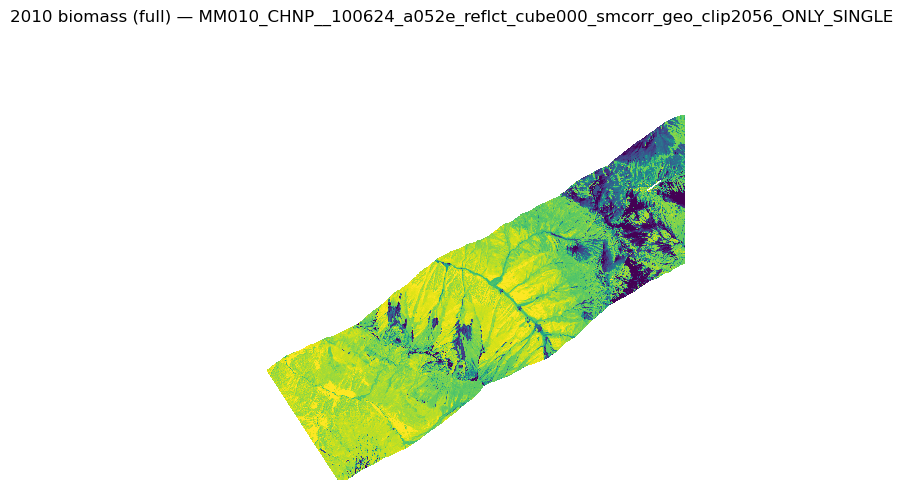

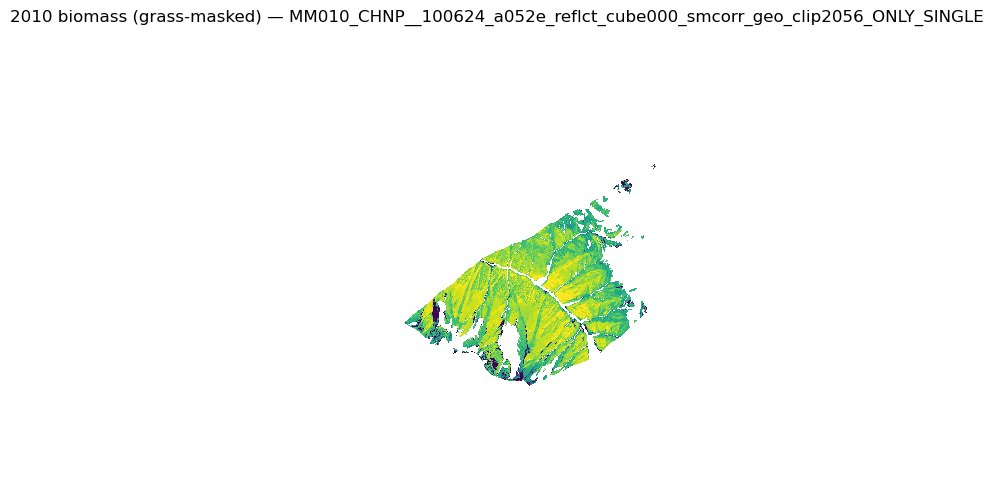

💾 Saved grass-masked raster: D:/Biomass_Maps_modified_Minnaert\Biomass_2010_MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE_modified_Minnaert_grass.tif


In [3]:
# Single File (masked variant)

import os, time
import numpy as np
import rasterio
from rasterio.features import geometry_mask
import geopandas as gpd
import pandas as pd
from shapely.geometry import mapping
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

# ==========================================================
# USER SETTINGS
# ==========================================================
INPUT_RASTERS = {
    2010: r"D:/.../2010/_2010_ModMinnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq",
}
COEF_FILES = {
    2010: r"F:/.../r_model_output/PPR1_2010_Processing_3/2010_Processing_3_MAIN_MODELs-avg-COEFS.csv",
}
GRASS_MASK = Path(r"PPR1_Map_Data/SHAPEFILES/derived/SNP_grassland_clip_to_aoi_EPSG2056.shp")
# EPSG 2056

OUTDIR = r"D:/Biomass_Maps_modified_Minnaert"
os.makedirs(OUTDIR, exist_ok=True)

# NEW: toggles (minimal addition)
USE_GRASS_MASK = True        # <<< set True to apply grass mask
SAVE_FULL_OUTPUT = False     # save unmasked raster as well
SAVE_MASKED_OUTPUT = True    # save masked result as GeoTIFF

SCALE = 1.0                  # 0–10000 → 0–1 would be 0.0001

# Band exclusion rules (1-based indices)
EXCLUDE_BANDS = {
    2010: list(range(105, 107)) + list(range(279, 285)),
}

# Treat zeros as nodata (common in BSQ/ENVI rasters)
TREAT_ZERO_AS_NODATA = True

# ==========================================================
# FUNCTIONS
# ==========================================================
def load_coefs(csv_path):
    df = pd.read_csv(csv_path)
    col = None
    for c in ["Avg_Coefficients", "Avg_Coefficents", "Estimate", "coef", "coeff"]:
        if c in df.columns:
            col = c; break
    if col is None:
        raise ValueError(f"Could not find coefficient column in {csv_path}.")
    vals = df[col].astype(float).to_numpy()
    intercept = float(vals[0])
    betas = vals[1:]
    return intercept, betas

def build_grass_mask(grass_path, ref_ds):
    """Return boolean mask (True inside grass) aligned to ref_ds grid."""
    grass = gpd.read_file(grass_path)
    if grass.empty:
        raise ValueError("Grassland shapefile has no geometries.")
    if grass.crs is None:
        grass.set_crs(ref_ds.crs, inplace=True)
    elif grass.crs.to_string() != ref_ds.crs.to_string():
        grass = grass.to_crs(ref_ds.crs)

    geoms = []
    for g in grass.geometry:
        if g is None or g.is_empty:
            continue
        try:
            geoms.append(mapping(g.buffer(0)))  # fix minor invalid rings
        except Exception:
            geoms.append(mapping(g))
    if not geoms:
        raise ValueError("All grassland geometries empty/invalid after cleaning.")

    H, W = ref_ds.height, ref_ds.width
    mask_in = geometry_mask(
        geoms,
        out_shape=(H, W),
        transform=ref_ds.transform,
        invert=True  # True where INSIDE grass
    )
    return mask_in

def build_biomass_full(year, raster_path, coef_path):
    """
    Compute wall-to-wall biomass (NO grassland masking here).
    Returns biomass array and the source profile (for optional saving).
    Prevents 'green background' by masking pixels with no valid bands.
    """
    print(f"\n=== {year} (full, no mask) ===")
    t0 = time.time()
    intercept, betas = load_coefs(coef_path)
    print(f"Loaded coefficients: {len(betas)} + intercept")

    with rasterio.open(raster_path) as src:
        n_bands = src.count
        H, W = src.height, src.width
        nodata = src.nodata
        print(f"Raster bands: {n_bands} | size: {W}x{H} | nodata={nodata}")

        exclude = set(EXCLUDE_BANDS[year])
        include_bands = [b for b in range(1, n_bands+1) if b not in exclude]
        if len(include_bands) != len(betas):
            raise ValueError(
                f"Band/coef mismatch {year}: usable={len(include_bands)} vs coefs={len(betas)}"
            )

        biomass = np.zeros((H, W), dtype="float32")
        coverage = np.zeros((H, W), dtype=bool)

        band_bar = tqdm(zip(include_bands, betas), total=len(include_bands),
                        desc=f"Accumulating {year}", unit="band")
        for band_idx, beta in band_bar:
            arr = src.read(band_idx).astype("float32", copy=False)

            valid = np.isfinite(arr)
            if nodata is not None and np.isfinite(nodata):
                valid &= (arr != nodata)
            if TREAT_ZERO_AS_NODATA:
                valid &= (arr != 0.0)

            if SCALE != 1.0:
                arr[valid] *= SCALE

            biomass[valid] += np.float32(beta) * arr[valid]
            coverage |= valid

        biomass[coverage] += np.float32(intercept)
        biomass[~coverage] = np.nan

        profile = src.profile

    print(f"✅ Finished {year} in {time.time()-t0:.1f}s")
    return biomass, profile

def save_raster(path, arr, profile):
    """Write a single-band float32 GeoTIFF with LZW compression."""
    prof = profile.copy()
    prof.update(driver="GTiff",
                count=1,
                dtype="float32",
                nodata=np.float32(np.nan),
                compress="LZW",
                BIGTIFF="IF_SAFER",
                tiled=True,
                blockxsize=512,
                blockysize=512)
    with rasterio.open(path, "w", **prof) as dst:
        dst.write(arr, 1)

# ==========================================================
# RUN
# ==========================================================
year = 2010
raster_path = INPUT_RASTERS[year]
coef_path   = COEF_FILES[year]
in_stem     = Path(raster_path).stem

# 1) Full biomass
full_arr, src_profile = build_biomass_full(year, raster_path, coef_path)

# 2) Optional: compute/apply grass mask (minimal change)
masked_arr = None
if USE_GRASS_MASK:
    with rasterio.open(raster_path) as src_for_mask:
        grass_mask = build_grass_mask(GRASS_MASK, src_for_mask)  # True = inside grass
    masked_arr = full_arr.copy()
    masked_arr[~grass_mask] = np.nan

# 3) Quicklooks
valid_full = np.isfinite(full_arr)
vmin_f, vmax_f = (np.nanpercentile(full_arr[valid_full], [2.5, 97.5])
                  if valid_full.any() else (0.0, 1.0))

plt.figure(figsize=(6, 5))
plt.imshow(np.ma.masked_invalid(full_arr), vmin=vmin_f, vmax=vmax_f,
           cmap="viridis", interpolation="nearest")
plt.title(f"{year} biomass (full) — {in_stem}")
plt.axis("off"); plt.tight_layout(); plt.show()

if USE_GRASS_MASK:
    valid_m = np.isfinite(masked_arr)
    vmin_m, vmax_m = (np.nanpercentile(masked_arr[valid_m], [2.5, 97.5])
                      if valid_m.any() else (0.0, 1.0))
    plt.figure(figsize=(6, 5))
    plt.imshow(np.ma.masked_invalid(masked_arr), vmin=vmin_m, vmax=vmax_m,
               cmap="viridis", interpolation="nearest")
    plt.title(f"{year} biomass (grass-masked) — {in_stem}")
    plt.axis("off"); plt.tight_layout(); plt.show()

# 4) Saves (unique names; no overwrite)
if SAVE_FULL_OUTPUT:
    out_full = os.path.join(OUTDIR, f"Biomass_{year}_{in_stem}_modified_Minnaert_full.tif")
    save_raster(out_full, full_arr, src_profile)
    print(f"💾 Saved full raster: {out_full}")

if USE_GRASS_MASK and SAVE_MASKED_OUTPUT:
    out_mask = os.path.join(OUTDIR, f"Biomass_{year}_{in_stem}_modified_Minnaert_grass.tif")
    save_raster(out_mask, masked_arr, src_profile)
    print(f"💾 Saved grass-masked raster: {out_mask}")


## Main Loop (Revised) with the ENVI (SAM) generated cloud mask


METHOD: Lambertian

--- Lambertian | 2010 ---
Raster : D:/Main_Data_From_Christian_Anna-s_1st_SNP_DATA/SNP_APEX_DATA_Lambertian/L_2010_APEX_processed2011/TRU_subset/_2010_Lambertian_clip2056_ONLY/CHNP1100624_052e_polishRefl_sub_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2010_Processing_1/2010_Processing_1_MAIN_MODELs-avg-COEFS.csv

=== 2010 (biomass; pre-mask=off) ===
Loaded coefficients: 276 + intercept
Raster bands: 285 | size: 3709x3580 | nodata=9000.0


Accumulating 2010: 100%|███████████████████████████████████████████████████████████| 276/276 [01:20<00:00,  3.42band/s]


✅ Finished 2010 in 87.0s


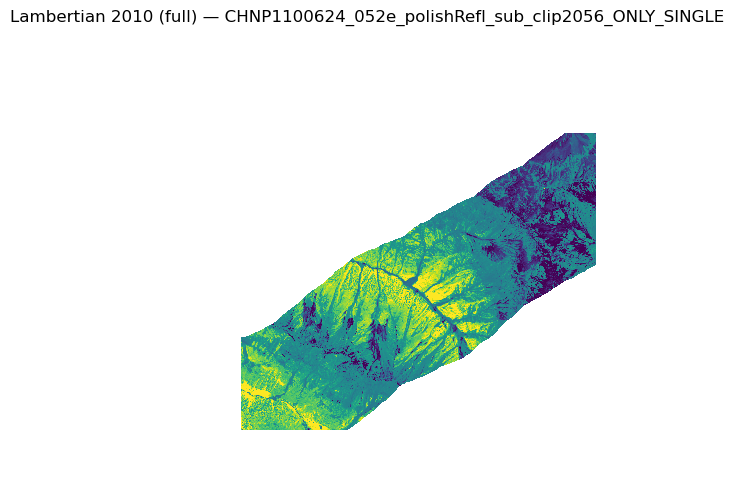

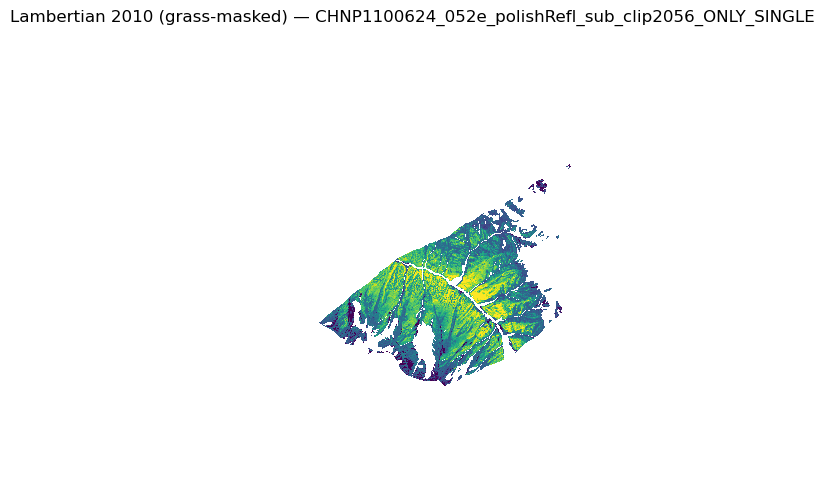

💾 Saved grass-masked raster: D:/Biomass_Maps_Lambertian\Lambertian_2010_CHNP1100624_052e_polishRefl_sub_clip2056_ONLY_SINGLE_grass.tif

--- Lambertian | 2012 ---
Raster : D:/Main_Data_From_Christian_Anna-s_1st_SNP_DATA/SNP_APEX_DATA_Lambertian/L_2012_APEX/_2012_Lambertian_clip2056_ONLY/CHNP2120629_a32d_polish_cube000_geo_s1_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2012_Processing_1/2012_Processing_1_MAIN_MODELs-avg-COEFS.csv
• Applied 2012 cloud shapefile as pre-mask.

=== 2012 (biomass; pre-mask=on) ===
Loaded coefficients: 276 + intercept
Raster bands: 299 | size: 3709x3580 | nodata=0.0


Accumulating 2012: 100%|███████████████████████████████████████████████████████████| 276/276 [00:33<00:00,  8.18band/s]


✅ Finished 2012 in 34.9s


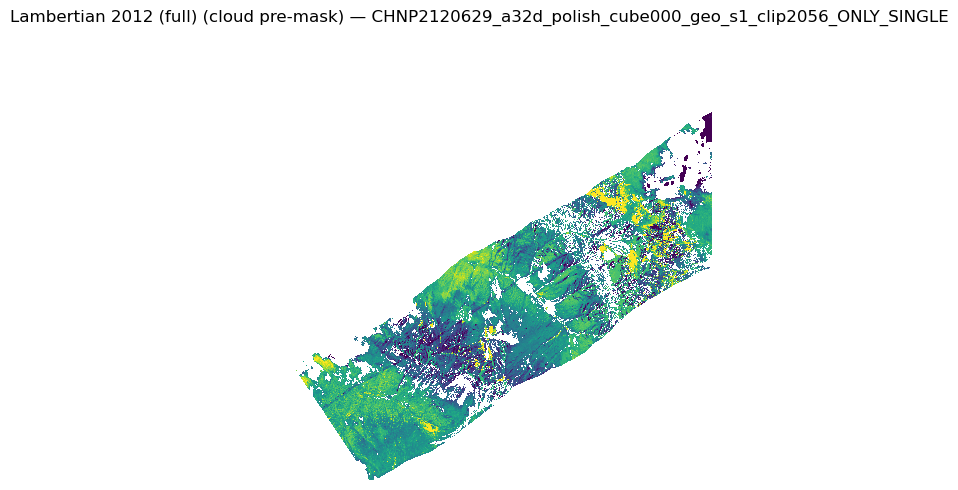

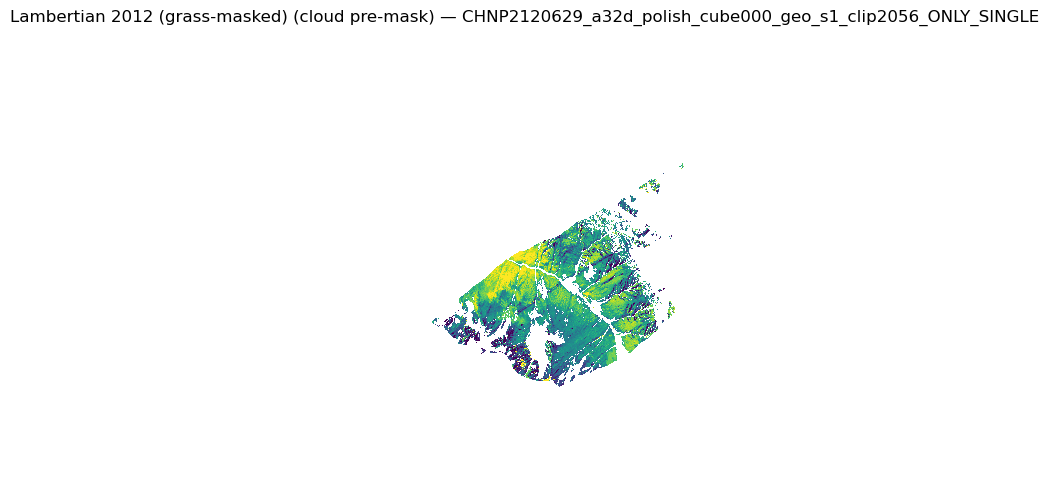

💾 Saved grass-masked raster: D:/Biomass_Maps_Lambertian\Lambertian_2012_CHNP2120629_a32d_polish_cube000_geo_s1_clip2056_ONLY_SINGLE_cloudPre_grass.tif

--- Lambertian | 2013 ---
Raster : D:/Main_Data_From_Christian_Anna-s_1st_SNP_DATA/SNP_APEX_DATA_Lambertian/L_2013_APEX/_2013_Lambertian_clip2056_ONLY/M0038130712_a032e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2013_Processing_1/2013_Processing_1_MAIN_MODELs-avg-COEFS.csv

=== 2013 (biomass; pre-mask=off) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2013: 100%|███████████████████████████████████████████████████████████| 276/276 [01:23<00:00,  3.31band/s]


✅ Finished 2013 in 84.7s


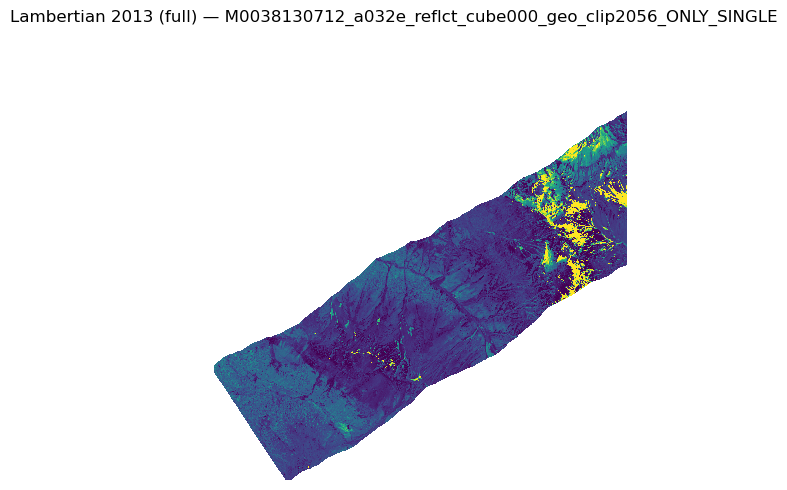

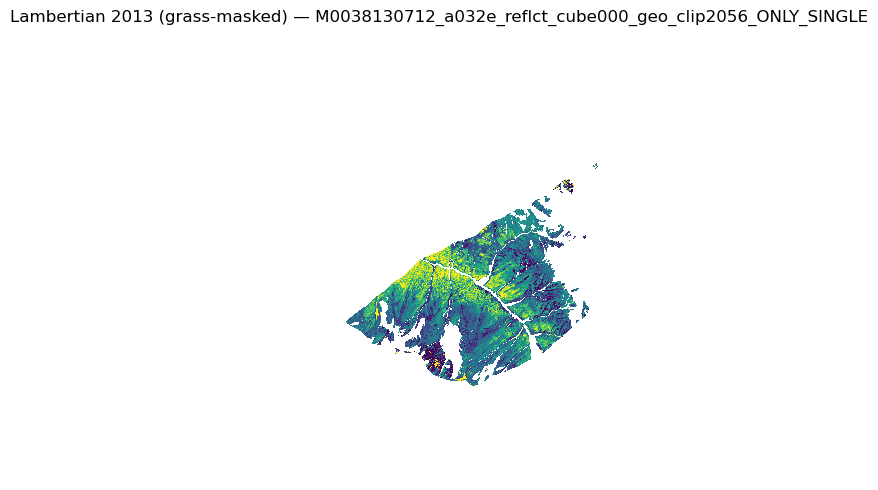

💾 Saved grass-masked raster: D:/Biomass_Maps_Lambertian\Lambertian_2013_M0038130712_a032e_reflct_cube000_geo_clip2056_ONLY_SINGLE_grass.tif

METHOD: Minnaert

--- Minnaert | 2010 ---
Raster : D:/MM010_reprocessed_ibrdf2/_2010_Minnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2010_Processing_2/2010_Processing_2_MAIN_MODELs-avg-COEFS.csv

=== 2010 (biomass; pre-mask=off) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2010: 100%|███████████████████████████████████████████████████████████| 276/276 [01:23<00:00,  3.31band/s]


✅ Finished 2010 in 84.9s


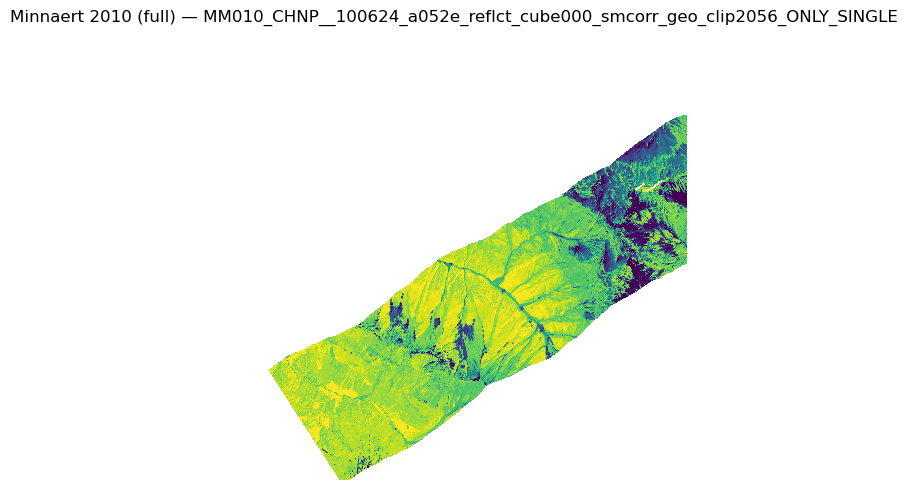

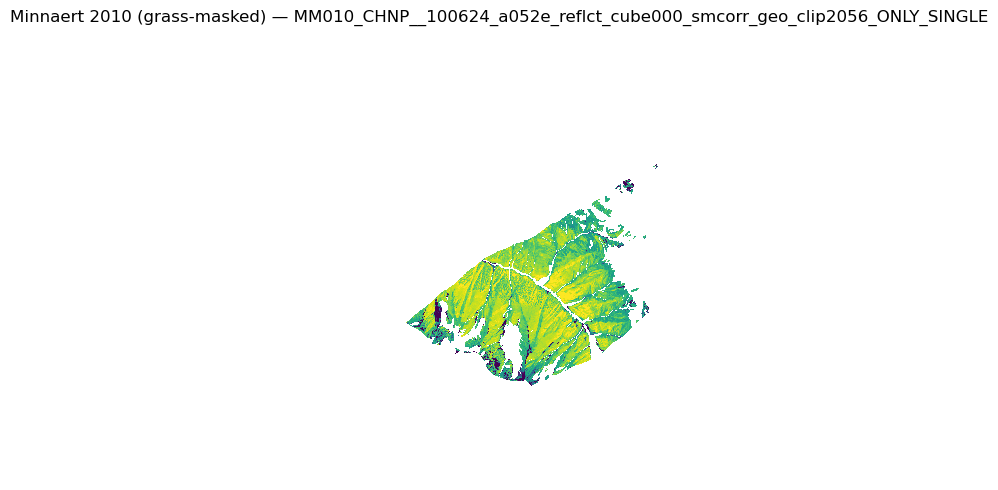

💾 Saved grass-masked raster: D:/Biomass_Maps_Minnaert\Minnaert_2010_MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE_grass.tif

--- Minnaert | 2012 ---
Raster : E:/APEX_DATA_SNP_IBRDF_2/SNP_2012/_2012_Minnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2012_Processing_2/2012_Processing_2_MAIN_MODELs-avg-COEFS.csv
• Applied 2012 cloud shapefile as pre-mask.

=== 2012 (biomass; pre-mask=on) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2012: 100%|███████████████████████████████████████████████████████████| 276/276 [01:28<00:00,  3.12band/s]


✅ Finished 2012 in 89.9s


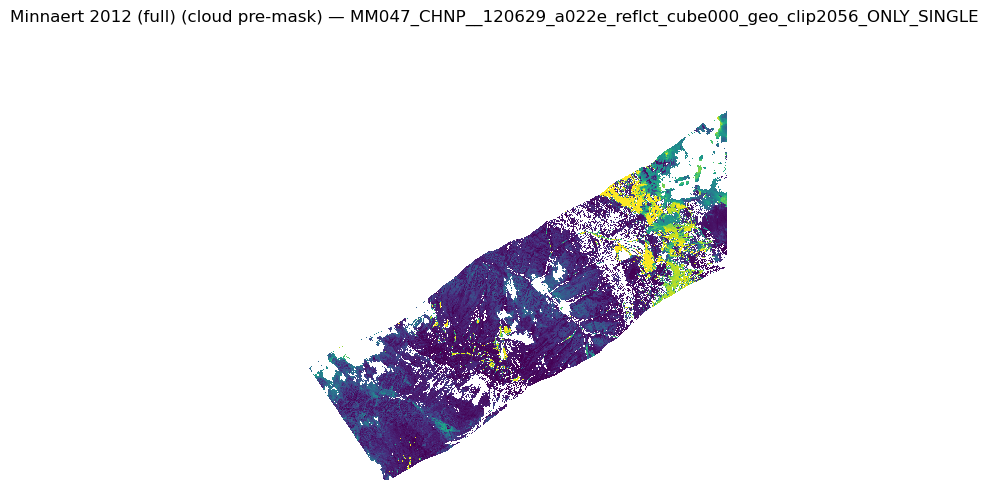

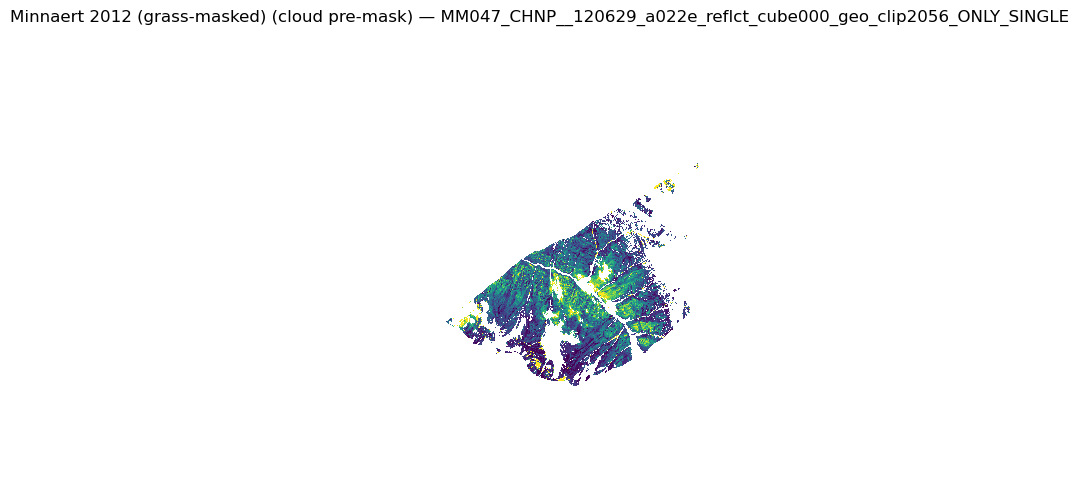

💾 Saved grass-masked raster: D:/Biomass_Maps_Minnaert\Minnaert_2012_MM047_CHNP__120629_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE_cloudPre_grass.tif

--- Minnaert | 2013 ---
Raster : E:/APEX_DATA_SNP_IBRDF_2/SNP_2013/_2013_Minnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2013_Processing_2/2013_Processing_2_MAIN_MODELs-avg-COEFS.csv

=== 2013 (biomass; pre-mask=off) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2013: 100%|███████████████████████████████████████████████████████████| 276/276 [01:51<00:00,  2.47band/s]


✅ Finished 2013 in 113.1s


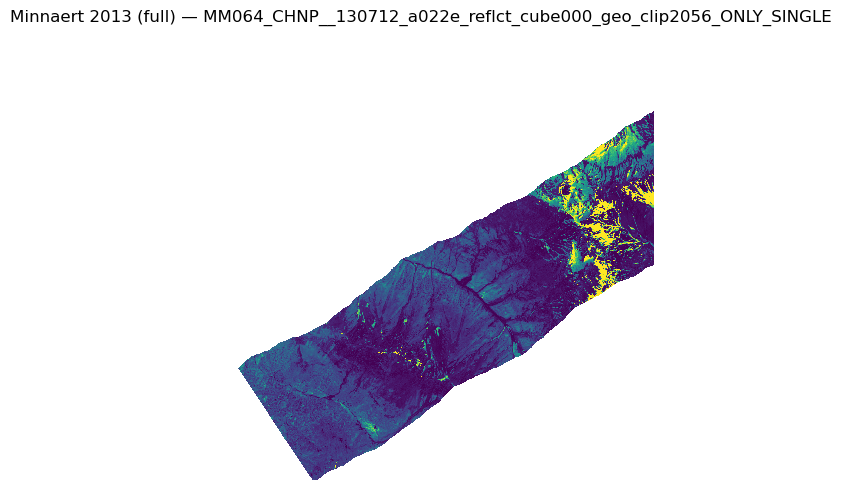

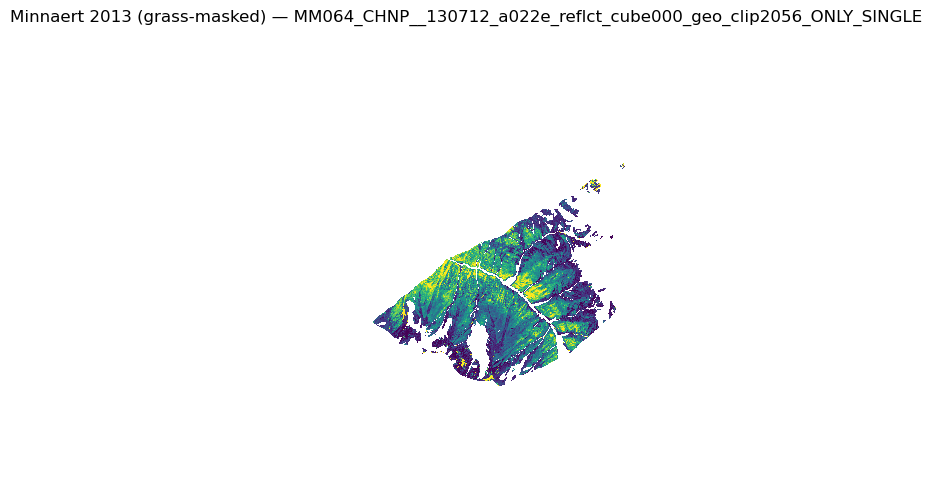

💾 Saved grass-masked raster: D:/Biomass_Maps_Minnaert\Minnaert_2013_MM064_CHNP__130712_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE_grass.tif

METHOD: ModMinnaert

--- ModMinnaert | 2010 ---
Raster : F:/SNP_BRDF_21_MAIN_georectified_data/2010/_2010_ModMinnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2010_Processing_3/2010_Processing_3_MAIN_MODELs-avg-COEFS.csv

=== 2010 (biomass; pre-mask=off) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2010: 100%|███████████████████████████████████████████████████████████| 276/276 [01:30<00:00,  3.06band/s]


✅ Finished 2010 in 95.6s


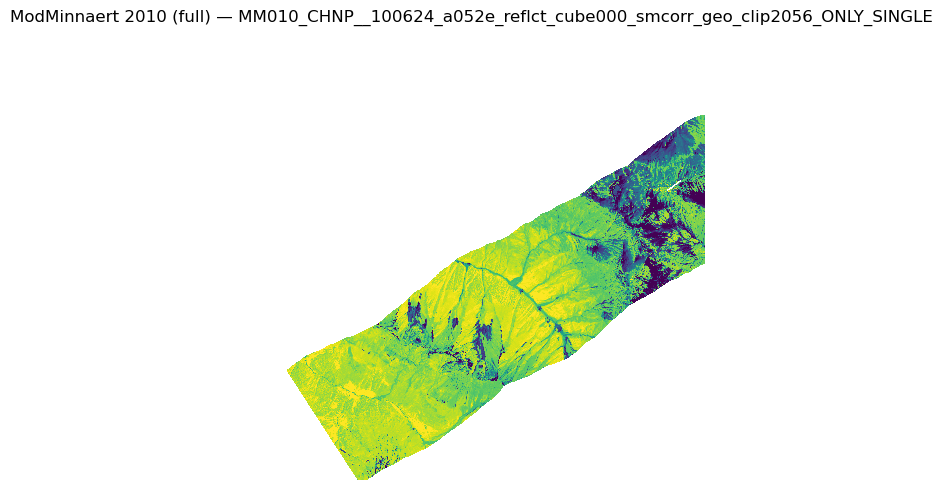

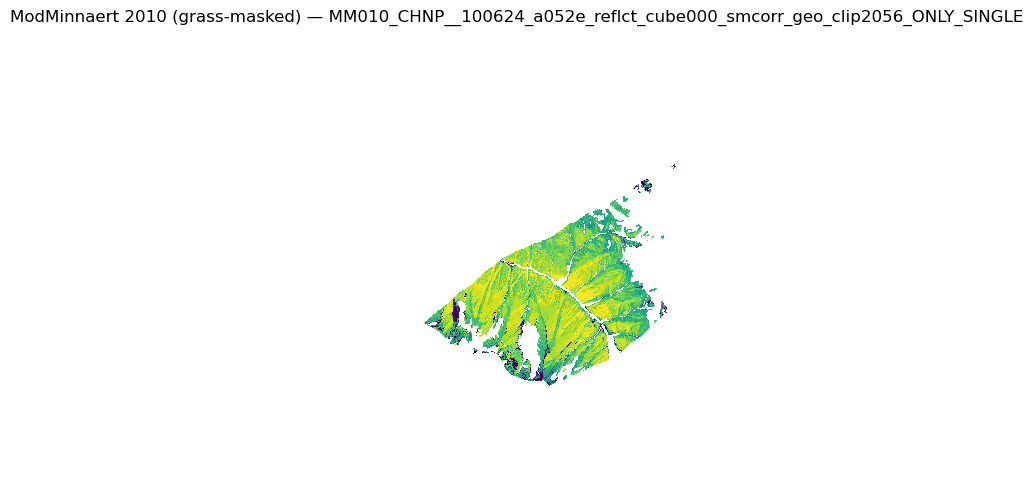

💾 Saved grass-masked raster: D:/Biomass_Maps_modified_Minnaert\ModMinnaert_2010_MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE_grass.tif

--- ModMinnaert | 2012 ---
Raster : F:/SNP_BRDF_21_MAIN_georectified_data/2012/_2012_ModMinnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2012_Processing_3/2012_Processing_3_MAIN_MODELs-avg-COEFS.csv
• Applied 2012 cloud shapefile as pre-mask.

=== 2012 (biomass; pre-mask=on) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2012: 100%|███████████████████████████████████████████████████████████| 276/276 [01:32<00:00,  2.97band/s]


✅ Finished 2012 in 93.6s


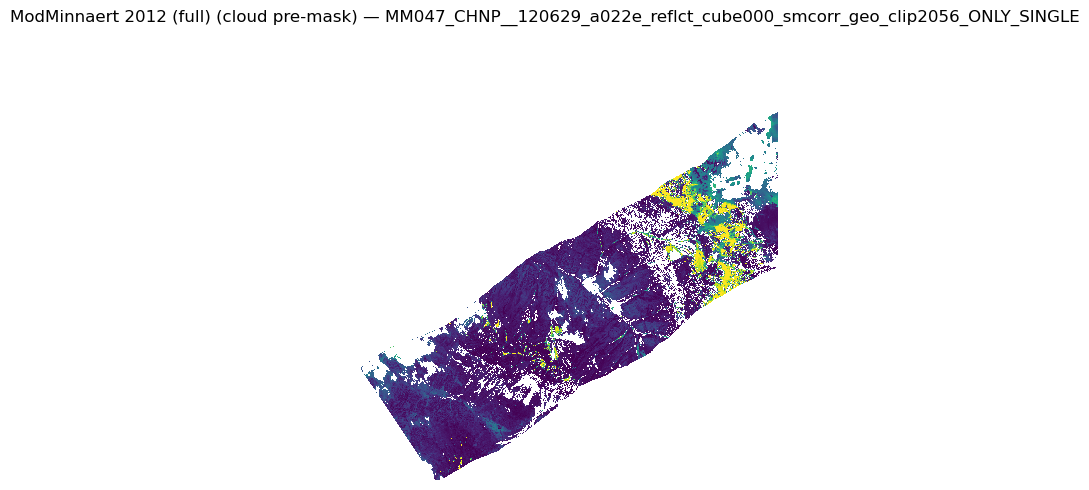

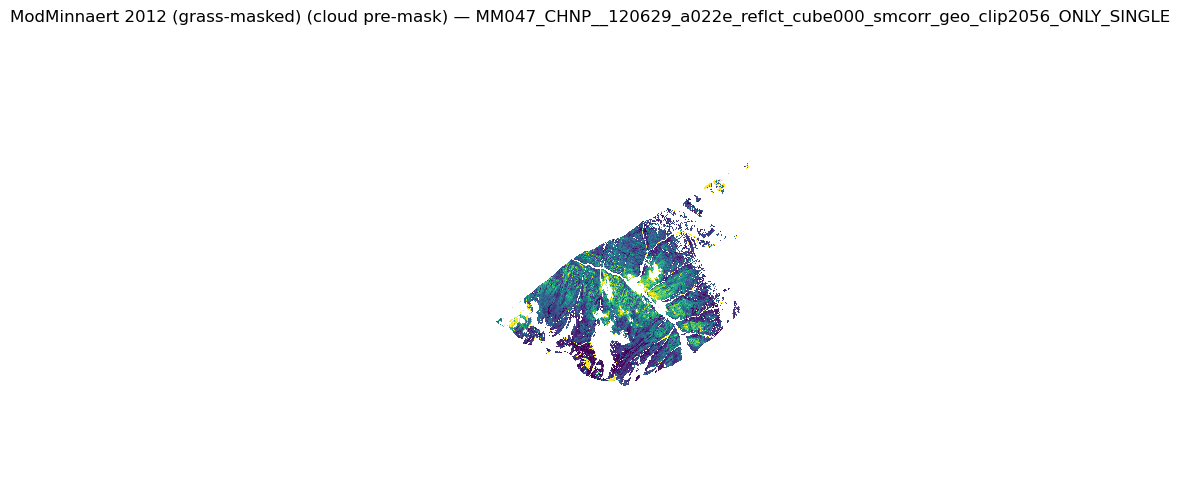

💾 Saved grass-masked raster: D:/Biomass_Maps_modified_Minnaert\ModMinnaert_2012_MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE_cloudPre_grass.tif

--- ModMinnaert | 2013 ---
Raster : F:/SNP_BRDF_21_MAIN_georectified_data/2013/_2013_ModMinnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq
Coefs  : F:/WVL_Interpolations/APEX+FIELD_data_scripts/Model_Files/r_model_output/PPR1_2013_Processing_3/2013_Processing_3_MAIN_MODELs-avg-COEFS.csv

=== 2013 (biomass; pre-mask=off) ===
Loaded coefficients: 276 + intercept
Raster bands: 284 | size: 3709x3580 | nodata=15000.0


Accumulating 2013: 100%|███████████████████████████████████████████████████████████| 276/276 [01:31<00:00,  3.01band/s]


✅ Finished 2013 in 92.7s


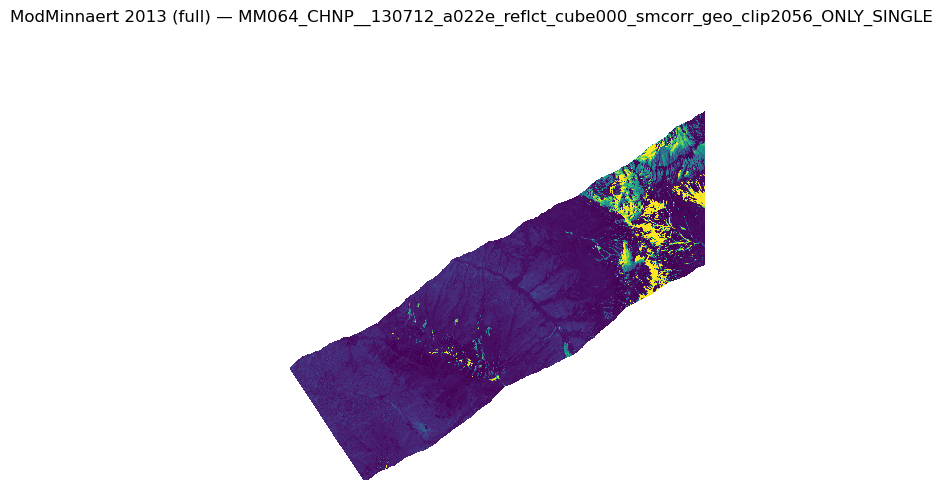

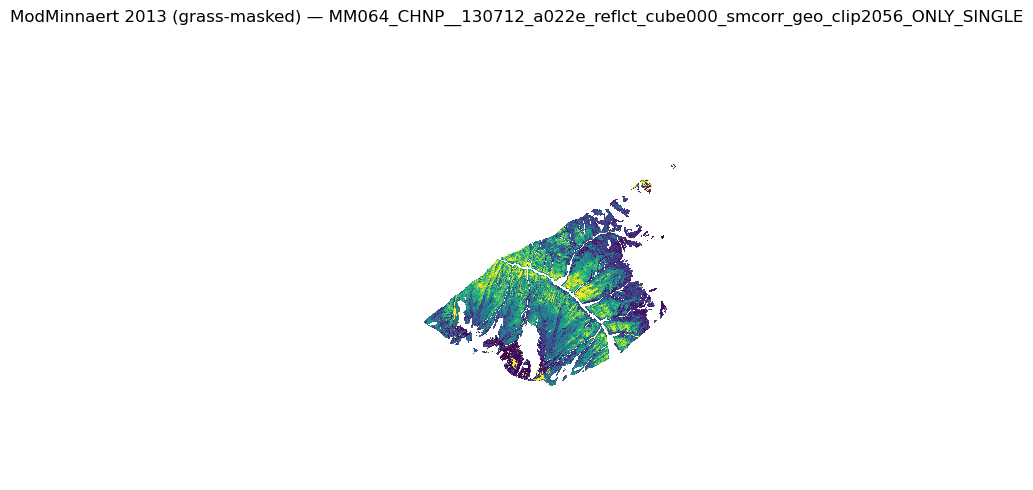

💾 Saved grass-masked raster: D:/Biomass_Maps_modified_Minnaert\ModMinnaert_2013_MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE_grass.tif


In [19]:
# === Multi-method, multi-year runner (with 2012 cloud shapefile pre-mask) ===

import os, time
import numpy as np
import rasterio
from rasterio.features import geometry_mask
import geopandas as gpd
import pandas as pd
from shapely.geometry import mapping
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

# ----------------------------------------------------------
# GLOBAL toggles (apply to all methods unless overridden below)
# ----------------------------------------------------------
USE_GRASS_MASK = True
SAVE_FULL_OUTPUT = False
SAVE_MASKED_OUTPUT = True
SHOW_PLOTS = True

# Default scale/zero handling (can be overridden per method if needed)
SCALE = 1.0
TREAT_ZERO_AS_NODATA = True

# Shared grass mask
GRASS_MASK = Path(r"PPR1_Map_Data/SHAPEFILES/derived/SNP_grassland_clip_to_aoi_EPSG2056.shp")

# NEW: 2012 cloud mask shapefile (polygons are cloudy areas to discard)
Cloud_mask = Path(r"D:/cloud_mask_2012.shp")

# ----------------------------------------------------------
# HELPERS
# ----------------------------------------------------------
def load_coefs(csv_path):
    df = pd.read_csv(csv_path)
    col = None
    for c in ["Avg_Coefficients", "Avg_Coefficents", "Estimate", "coef", "coeff"]:
        if c in df.columns:
            col = c; break
    if col is None:
        raise ValueError(f"Could not find coefficient column in {csv_path}.")
    vals = df[col].astype(float).to_numpy()
    intercept = float(vals[0]); betas = vals[1:]
    return intercept, betas

def build_grass_mask(grass_path, ref_ds):
    grass = gpd.read_file(grass_path)
    if grass.empty:
        raise ValueError("Grassland shapefile has no geometries.")
    if grass.crs is None:
        grass.set_crs(ref_ds.crs, inplace=True)
    elif grass.crs.to_string() != ref_ds.crs.to_string():
        grass = grass.to_crs(ref_ds.crs)

    geoms = []
    for g in grass.geometry:
        if g is None or g.is_empty:
            continue
        try:
            geoms.append(mapping(g.buffer(0)))
        except Exception:
            geoms.append(mapping(g))

    H, W = ref_ds.height, ref_ds.width
    mask_in = geometry_mask(
        geoms,
        out_shape=(H, W),
        transform=ref_ds.transform,
        invert=True  # True where inside grass
    )
    return mask_in

# NEW: build a boolean "keep" mask from a cloud polygon shapefile (True = keep, i.e., NOT cloud)
def build_cloud_keep_mask(cloud_shp, ref_ds):
    """
    Rasterizes cloud polygons to the ref raster grid.
    Returns boolean array: True where we KEEP data (outside clouds), False inside clouds.
    """
    clouds = gpd.read_file(cloud_shp)
    if clouds.empty:
        raise ValueError("Cloud shapefile has no geometries.")
    if clouds.crs is None:
        clouds.set_crs(ref_ds.crs, inplace=True)
    elif clouds.crs.to_string() != ref_ds.crs.to_string():
        clouds = clouds.to_crs(ref_ds.crs)

    geoms = []
    for g in clouds.geometry:
        if g is None or g.is_empty:
            continue
        try:
            geoms.append(mapping(g.buffer(0)))
        except Exception:
            geoms.append(mapping(g))

    H, W = ref_ds.height, ref_ds.width
    # geometry_mask with invert=False => True OUTSIDE polygons, False INSIDE polygons
    keep_mask = geometry_mask(
        geoms,
        out_shape=(H, W),
        transform=ref_ds.transform,
        invert=False
    )
    return keep_mask  # True = outside clouds (keep); False = inside clouds (discard)

def build_biomass_full(year, raster_path, coef_path, pre_mask=None):
    # NOTE: uses global EXCLUDE_BANDS, SCALE, TREAT_ZERO_AS_NODATA
    # MINIMAL CHANGE: added optional pre_mask argument; rest unchanged.
    print(f"\n=== {year} (biomass; pre-mask={'on' if pre_mask is not None else 'off'}) ===")
    t0 = time.time()
    intercept, betas = load_coefs(coef_path)
    print(f"Loaded coefficients: {len(betas)} + intercept")

    with rasterio.open(raster_path) as src:
        n_bands = src.count
        H, W = src.height, src.width
        nodata = src.nodata
        print(f"Raster bands: {n_bands} | size: {W}x{H} | nodata={nodata}")

        exclude = set(EXCLUDE_BANDS[year])
        include_bands = [b for b in range(1, n_bands+1) if b not in exclude]
        if len(include_bands) != len(betas):
            raise ValueError(
                f"Band/coef mismatch {year}: usable={len(include_bands)} vs coefs={len(betas)}"
            )

        biomass = np.zeros((H, W), dtype="float32")
        coverage = np.zeros((H, W), dtype=bool)

        band_bar = tqdm(zip(include_bands, betas), total=len(include_bands),
                        desc=f"Accumulating {year}", unit="band")
        for band_idx, beta in band_bar:
            arr = src.read(band_idx).astype("float32", copy=False)

            valid = np.isfinite(arr)
            if nodata is not None and np.isfinite(nodata):
                valid &= (arr != nodata)
            if TREAT_ZERO_AS_NODATA:
                valid &= (arr != 0.0)
            # NEW: apply cloud pre-mask (True=keep)
            if pre_mask is not None:
                valid &= pre_mask

            if SCALE != 1.0:
                arr[valid] *= SCALE

            biomass[valid] += np.float32(beta) * arr[valid]
            coverage |= valid

        biomass[coverage] += np.float32(intercept)
        biomass[~coverage] = np.nan

        profile = src.profile

    print(f"✅ Finished {year} in {time.time()-t0:.1f}s")
    return biomass, profile

def save_raster(path, arr, profile):
    prof = profile.copy()
    prof.update(driver="GTiff",
                count=1,
                dtype="float32",
                nodata=np.float32(np.nan),
                compress="LZW",
                BIGTIFF="IF_SAFER",
                tiled=True,
                blockxsize=512,
                blockysize=512)
    with rasterio.open(path, "w", **prof) as dst:
        dst.write(arr, 1)

# ----------------------------------------------------------
# METHOD CONFIGS (your inputs grouped)
# ----------------------------------------------------------
METHODS = {
    "Lambertian": {
        "INPUT_RASTERS": {
            2010: r"D:/.../L_2010_APEX_processed2011/TRU_subset/_2010_Lambertian_clip2056_ONLY/CHNP1100624_052e_polishRefl_sub_clip2056_ONLY_SINGLE.bsq",
            2012: r"D:/.../L_2012_APEX/_2012_Lambertian_clip2056_ONLY/CHNP2120629_a32d_polish_cube000_geo_s1_clip2056_ONLY_SINGLE.bsq",
            2013: r"D:/.../L_2013_APEX/_2013_Lambertian_clip2056_ONLY/M0038130712_a032e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq",
        },
        "INPUT_HDRS": {
            2010: r"D:/.../L_2010_APEX_processed2011/TRU_subset/_2010_Lambertian_clip2056_ONLY/CHNP1100624_052e_polishRefl_sub_clip2056_ONLY_SINGLE.hdr",
            2012: r"D:/.../L_2012_APEX/_2012_Lambertian_clip2056_ONLY/CHNP2120629_a32d_polish_cube000_geo_s1_clip2056_ONLY_SINGLE.hdr",
            2013: r"D:/.../L_2013_APEX/_2013_Lambertian_clip2056_ONLY/M0038130712_a032e_reflct_cube000_geo_clip2056_ONLY_SINGLE.hdr",
        },
        "COEF_FILES": {
            2010: r"D:/.../PPR1_2010_Processing_1/2010_Processing_1_MAIN_MODELs-avg-COEFS.csv",
            2012: r"D:/.../PPR1_2012_Processing_1/2012_Processing_1_MAIN_MODELs-avg-COEFS.csv",
            2013: r"D:/.../PPR1_2013_Processing_1/2013_Processing_1_MAIN_MODELs-avg-COEFS.csv",
        },
        "EXCLUDE_BANDS": {
            2010: [1] + list(range(106,110)) + list(range(282,286)),
            2012: list(range(1,4)) + list(range(108,112)) + list(range(284,300)),
            2013: [1] + list(range(106,110)) + list(range(282,285)),
        },
        "OUTDIR": r"D:/Biomass_Maps_Lambertian",
    },
    "Minnaert": {
        "INPUT_RASTERS": {
            2010: r"D:/.../_2010_Minnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq",
            2012: r"D:/.../SNP_2012/_2012_Minnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq",
            2013: r"D:/.../SNP_2013/_2013_Minnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.bsq",
        },
        "INPUT_HDRS": {
            2010: r"D:/.../_2010_Minnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.hdr",
            2012: r"D:/.../SNP_2012/_2012_Minnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.hdr",
            2013: r"D:/.../SNP_2013/_2013_Minnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_geo_clip2056_ONLY_SINGLE.hdr",
        },
        "COEF_FILES": {
            2010: r"D:/.../PPR1_2010_Processing_2/2010_Processing_2_MAIN_MODELs-avg-COEFS.csv",
            2012: r"D:/.../PPR1_2012_Processing_2/2012_Processing_2_MAIN_MODELs-avg-COEFS.csv",
            2013: r"D:/.../PPR1_2013_Processing_2/2013_Processing_2_MAIN_MODELs-avg-COEFS.csv",
        },
        "EXCLUDE_BANDS": {
            2010: list(range(105, 107)) + list(range(279, 285)),
            2012: [1] + list(range(106, 108)) + list(range(280, 285)),
            2013: [1] + list(range(106, 108)) + list(range(280, 285)),
        },
        "OUTDIR": r"D:/Biomass_Maps_Minnaert",
    },
    "ModMinnaert": {
        "INPUT_RASTERS": {
            2010: r"D:/.../2010/_2010_ModMinnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq",
            2012: r"D:/.../2012/_2012_ModMinnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq",
            2013: r"D:/.../2013/_2013_ModMinnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.bsq",
        },
        "INPUT_HDRS": {
            2010: r"D:/.../2010/_2010_ModMinnaert_clip2056_ONLY/MM010_CHNP__100624_a052e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.hdr",
            2012: r"D:/.../2012/_2012_ModMinnaert_clip2056_ONLY/MM047_CHNP__120629_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.hdr",
            2013: r"D:/.../2013/_2013_ModMinnaert_clip2056_ONLY/MM064_CHNP__130712_a022e_reflct_cube000_smcorr_geo_clip2056_ONLY_SINGLE.hdr",
        },
        "COEF_FILES": {
            2010: r"D:/.../PPR1_2010_Processing_3/2010_Processing_3_MAIN_MODELs-avg-COEFS.csv",
            2012: r"D:/.../PPR1_2012_Processing_3/2012_Processing_3_MAIN_MODELs-avg-COEFS.csv",
            2013: r"D:/.../PPR1_2013_Processing_3/2013_Processing_3_MAIN_MODELs-avg-COEFS.csv",
        },
        "EXCLUDE_BANDS": {
            2010: list(range(105, 107)) + list(range(279, 285)),
            2012: list(range(105, 107)) + list(range(279, 285)),
            2013: [105] + list(range(278, 285)),
        },
        "OUTDIR": r"D:/Biomass_Maps_modified_Minnaert",
    },
}

# ----------------------------------------------------------
# RUN LOOP
# ----------------------------------------------------------
for method_name, cfg in METHODS.items():
    print("\n" + "="*80)
    print(f"METHOD: {method_name}")
    print("="*80)

    # Rebind globals for this method (minimal change to your functions)
    EXCLUDE_BANDS = cfg["EXCLUDE_BANDS"]
    OUTDIR = cfg["OUTDIR"]
    os.makedirs(OUTDIR, exist_ok=True)

    # Optional per-method overrides
    SCALE = cfg.get("SCALE", SCALE)
    TREAT_ZERO_AS_NODATA = cfg.get("TREAT_ZERO_AS_NODATA", TREAT_ZERO_AS_NODATA)

    for year, raster_path in cfg["INPUT_RASTERS"].items():
        coef_path = cfg["COEF_FILES"][year]
        in_stem = Path(raster_path).stem

        print(f"\n--- {method_name} | {year} ---")
        print(f"Raster : {raster_path}")
        print(f"Coefs  : {coef_path}")

        try:
            # NEW: build cloud keep-mask ONLY for 2012 (True = keep)
            cloud_keep = None
            if year == 2012 and Cloud_mask.exists():
                with rasterio.open(raster_path) as src_for_cloud:
                    cloud_keep = build_cloud_keep_mask(Cloud_mask, src_for_cloud)
                print("• Applied 2012 cloud shapefile as pre-mask.")

            # 1) Full biomass (apply cloud pre-mask if available)
            full_arr, src_profile = build_biomass_full(year, raster_path, coef_path, pre_mask=cloud_keep)

            # 2) Optional grass mask (kept in same place to minimize changes)
            masked_arr = None
            if USE_GRASS_MASK:
                with rasterio.open(raster_path) as src_for_mask:
                    grass_mask = build_grass_mask(GRASS_MASK, src_for_mask)
                masked_arr = full_arr.copy()
                masked_arr[~grass_mask] = np.nan

            # 3) Quicklooks (optional)
            if SHOW_PLOTS:
                valid_full = np.isfinite(full_arr)
                vmin_f, vmax_f = (np.nanpercentile(full_arr[valid_full], [2.5, 97.5])
                                  if valid_full.any() else (0.0, 1.0))
                plt.figure(figsize=(6, 5))
                plt.imshow(np.ma.masked_invalid(full_arr), vmin=vmin_f, vmax=vmax_f,
                           cmap="viridis", interpolation="nearest")
                title_suffix = " (cloud pre-mask)" if cloud_keep is not None else ""
                plt.title(f"{method_name} {year} (full){title_suffix} — {in_stem}")
                plt.axis("off"); plt.tight_layout(); plt.show()

                if USE_GRASS_MASK:
                    valid_m = np.isfinite(masked_arr)
                    vmin_m, vmax_m = (np.nanpercentile(masked_arr[valid_m], [2.5, 97.5])
                                      if valid_m.any() else (0.0, 1.0))
                    plt.figure(figsize=(6, 5))
                    plt.imshow(np.ma.masked_invalid(masked_arr), vmin=vmin_m, vmax=vmax_m,
                               cmap="viridis", interpolation="nearest")
                    plt.title(f"{method_name} {year} (grass-masked){title_suffix} — {in_stem}")
                    plt.axis("off"); plt.tight_layout(); plt.show()

            # 4) Saves (unique names; no overwrite)
            if SAVE_FULL_OUTPUT:
                tag = "_cloudPre" if (year == 2012 and cloud_keep is not None) else "_full"
                out_full = os.path.join(OUTDIR, f"{method_name}_{year}_{in_stem}{tag}.tif")
                save_raster(out_full, full_arr, src_profile)
                print(f"💾 Saved full raster: {out_full}")

            if USE_GRASS_MASK and SAVE_MASKED_OUTPUT:
                tag = "_cloudPre_grass" if (year == 2012 and cloud_keep is not None) else "_grass"
                out_mask = os.path.join(OUTDIR, f"{method_name}_{year}_{in_stem}{tag}.tif")
                save_raster(out_mask, masked_arr, src_profile)
                print(f"💾 Saved grass-masked raster: {out_mask}")

        except Exception as e:
            print(f"❌ Skipped {method_name} {year} due to error: {e}")
            continue


## Difference Maps & Aspect × slope bin summary based on the biomass maps

In [9]:
import os
import numpy as np
import rasterio
from rasterio.warp import reproject, Resampling
from rasterio.vrt import WarpedVRT
from rasterio.transform import Affine
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib.patches import FancyArrow
from matplotlib.ticker import FuncFormatter, MaxNLocator
from glob import glob  # needed by path_* helpers
from pyproj import Transformer
import pandas as pd

# ------------------------------------------------------------
# INPUT: folders containing the already-saved *full* maps
# ------------------------------------------------------------
LAM_DIR = r"D:/Biomass_Maps_Lambertian"
MIN_DIR = r"D:/Biomass_Maps_Minnaert"
MOD_DIR = r"D:/Biomass_Maps_modified_Minnaert"

# Hillshades by year
HILLSHADES = {
    2010: r"D:/.../hillshades_by_year/hillshade_2010_az130.8_alt59.4.tif",
    2012: r"D:/.../hillshades_by_year/hillshade_2012_az114.2_alt51.6.tif",
    2013: r"D:/.../hillshades_by_year/hillshade_2013_az140.9_alt60.7.tif",
}

# Slope & Aspect rasters (same for all years)
SLOPE_PATH  = r"D:/.../swissALTI3D2013_slope.tif"
ASPECT_PATH = r"D:/.../swissALTI3D2013_aspect.tif"

# Where to save results
OUT_DIR = r"D:/Biomass_Maps_Comparisons"
os.makedirs(OUT_DIR, exist_ok=True)

YEARS = [2010, 2012, 2013]
BIOMASS_UNITS = "g m$^{-2}$"

plt.rcParams.update({"font.family": "palatino linotype", "font.size": 10})
overlay_alpha   = 1 #0.85 # transparency of biomass overlay (higher = more visible biomass)
hillshade_alpha = 0.4 #0.55  # transparency of grayscale terrain background

# -------------------------------------------------------------------
# Helpers
# -------------------------------------------------------------------
def path_lam(y): return glob(os.path.join(LAM_DIR, f"Lambertian_{y}*_grass.tif"))[0]
def path_min(y): return glob(os.path.join(MIN_DIR, f"Minnaert_{y}*_grass.tif"))[0]
def path_mod(y): return glob(os.path.join(MOD_DIR, f"ModMinnaert_{y}*_grass.tif"))[0]

def raster_extent(profile):
    T = profile["transform"]
    w, h = profile["width"], profile["height"]
    left = T.c
    top = T.f
    right = left + T.a * w
    bottom = top + T.e * h
    return (left, right, bottom, top)

def add_north_arrow(ax, extent, size_frac=0.08):
    left, right, bottom, top = extent
    W, H = right - left, top - bottom
    x = left + 0.06 * W
    y = top - 0.10 * H
    length = size_frac * min(W, H)
    ax.add_patch(FancyArrow(x, y, 0, length * 0.8, width=0.0,
                            head_width=0.035 * W, head_length=0.05 * H,
                            length_includes_head=True, color="k"))
    ax.text(x, y - 0.02 * H, "N", ha="center", va="top", fontsize=10, fontweight="bold")

def add_scalebar(ax, extent, meters=1000, segments=4, pad_frac=0.06, label=None):
    left, right, bottom, top = extent
    W, H = right - left, top - bottom
    x0 = left + pad_frac * W
    y0 = bottom + pad_frac * H
    seg_len = meters / segments
    for i in range(segments):
        x_start = x0 + i * seg_len
        x_end = x_start + seg_len
        color = "k" if i % 2 == 0 else "w"
        ax.plot([x_start, x_end], [y0, y0], lw=6, color=color, solid_capstyle="butt")
    ax.plot([x0, x0 + meters], [y0, y0], lw=1, color="k")
    if label is None:
        label = f"{int(meters/1000)} km" if meters >= 1000 else f"{int(meters)} m"
    ax.text(x0 + meters/2, y0 - 0.02*H, label, ha="center", va="top", fontsize=10)

def set_lonlat_ticks(ax, extent, proj_crs, n_lon=3, n_lat=3):
    """Format ticks as lon/lat and control frequency with MaxNLocator."""
    left, right, bottom, top = extent
    transformer = Transformer.from_crs(proj_crs, 4326, always_xy=True)

    def fmt_lon(x, pos):
        lon, _ = transformer.transform(x, (bottom+top)/2)
        return f"{lon:.3f}°"

    def fmt_lat(y, pos):
        _, lat = transformer.transform((left+right)/2, y)
        return f"{lat:.3f}°"

    ax.xaxis.set_major_locator(MaxNLocator(nbins=n_lon))
    ax.yaxis.set_major_locator(MaxNLocator(nbins=n_lat))
    ax.xaxis.set_major_formatter(FuncFormatter(fmt_lon))
    ax.yaxis.set_major_formatter(FuncFormatter(fmt_lat))
    ax.tick_params(axis='both', which='both', labelsize=8, length=2)
    ax.grid(color='k', alpha=0.08, lw=0.5)

    # --- NEW: rotate latitude (Y-axis) labels vertically ---
    for label in ax.get_yticklabels():
        label.set_rotation(90)       # rotate vertical
        label.set_verticalalignment('center')
        label.set_horizontalalignment('center')

def remove_all_spines(ax):
    for s in ax.spines.values():
        s.set_visible(False)

# ------------------------------------------------------------
# Raster alignment
# ------------------------------------------------------------
def load_raster_match_safe(src_path, ref_profile, resampling=Resampling.bilinear):
    H, W = ref_profile["height"], ref_profile["width"]
    dst = np.full((H, W), np.nan, dtype="float32")
    try:
        with rasterio.open(src_path) as src:
            src_nodata = src.nodata if src.nodata is not None else np.nan
            reproject(
                source=rasterio.band(src, 1),
                destination=dst,
                src_transform=src.transform,
                src_crs=src.crs,
                src_nodata=src_nodata if np.isfinite(src_nodata) else None,
                dst_transform=ref_profile["transform"],
                dst_crs=ref_profile["crs"],
                dst_nodata=np.nan,
                resampling=resampling)
        return dst
    except Exception:
        try:
            with rasterio.open(src_path) as src:
                vrt_opts = dict(
                    crs=ref_profile["crs"],
                    transform=ref_profile["transform"],
                    height=H, width=W, resampling=resampling)
                with WarpedVRT(src, **vrt_opts) as vrt:
                    arr = vrt.read(1, out_shape=(H, W)).astype("float32", copy=False)
                    nod = vrt.nodata
                    if nod is not None and np.isfinite(nod):
                        arr[arr == nod] = np.nan
                    return arr
        except Exception:
            with rasterio.open(src_path) as src:
                a = src.read(1).astype("float32")
                nod = src.nodata
                if nod is not None and np.isfinite(nod):
                    a[a == nod] = np.nan
                reproject(
                    source=a, destination=dst,
                    src_transform=src.transform, src_crs=src.crs,
                    src_nodata=np.nan,
                    dst_transform=ref_profile["transform"],
                    dst_crs=ref_profile["crs"],
                    dst_nodata=np.nan,
                    resampling=resampling)
            return dst

def nanmask(arr): return np.ma.masked_invalid(arr)

def clamp_nonnegative(a):
    if a is None: return None
    out = a.copy()
    np.copyto(out, 0.0, where=np.isfinite(out) & (out < 0))
    return out

# -----------------------------
# Helpers for bin summary
# -----------------------------
ASPECT_LABELS = ["N","NE","E","SE","S","SW","W","NW"]
SLOPE_BINS = np.array([0,10,20,30,40,1e9],dtype="float32")
SLOPE_LABELS = ["0–10","10–20","20–30","30–40","40+"]

def aspect_to_north_clockwise(aspect_east_ccw):
    return ((90.0 - aspect_east_ccw) % 360.0).astype("float32")

def aspect_to_sector_index(a_nc_deg):
    idx = np.floor(((a_nc_deg + 22.5) % 360.0) / 45.0).astype("int32")
    return np.clip(idx, 0, 7)

def slope_to_bin_index(slope_deg):
    return np.digitize(slope_deg, SLOPE_BINS, right=False) - 1

def per_bin_stats(absdiff, slope_deg, aspect_deg_nc):
    a_idx = aspect_to_sector_index(aspect_deg_nc)
    s_idx = slope_to_bin_index(slope_deg)
    valid = np.isfinite(absdiff) & np.isfinite(a_idx) & np.isfinite(s_idx)
    if not np.any(valid): return []
    rows = []
    for ai in range(8):
        for si in range(5):
            m = valid & (a_idx == ai) & (s_idx == si)
            if not np.any(m):
                med, p90, n = np.nan, np.nan, 0
            else:
                vals = absdiff[m]
                n = vals.size
                med = float(np.nanmedian(vals))
                p90 = float(np.nanpercentile(vals, 90))
            rows.append(dict(aspect_bin=ASPECT_LABELS[ai],
                             slope_bin=SLOPE_LABELS[si],
                             n_pixels=n,
                             median_abs_diff=med,
                             p90_abs_diff=p90))
    return rows

# ------------------------------------------------------------
# MAIN LOOP
# ------------------------------------------------------------
pooled_vals = []
cache = {}

for year in YEARS:
    lam_path = path_lam(year)
    min_path = path_min(year)
    mod_path = path_mod(year)
    shade_path = HILLSHADES[year]

    try:
        with rasterio.open(lam_path) as ref_ds:
            ref_profile = ref_ds.profile
            lam = ref_ds.read(1).astype("float32")
            if ref_ds.nodata is not None and np.isfinite(ref_ds.nodata):
                lam[lam == ref_ds.nodata] = np.nan
    except Exception as e:
        print(f"⚠️  Skipping {year}: failed to open Lambertian raster: {e}")
        continue

    extent = raster_extent(ref_profile)

    try:
        mn = load_raster_match_safe(min_path, ref_profile, Resampling.bilinear)
        md = load_raster_match_safe(mod_path, ref_profile, Resampling.bilinear)
        shade = load_raster_match_safe(shade_path, ref_profile, Resampling.bilinear)
    except Exception as e:
        print(f"⚠️  Skipping {year}: {e}")
        continue

    # === ZOOM-IN region (consistent across years) — using lon/lat bbox ===
    # Picture extent (degrees)
    LON_MIN, LON_MAX = 10.04271, 10.09669
    LAT_MIN, LAT_MAX = 46.58205, 46.61502

    # Convert lon/lat → raster's projected CRS
    to_proj = Transformer.from_crs(4326, ref_profile["crs"], always_xy=True)
    xmin, ymin = to_proj.transform(LON_MIN, LAT_MIN)
    xmax, ymax = to_proj.transform(LON_MAX, LAT_MAX)
    xmin, xmax = sorted([xmin, xmax])
    ymin, ymax = sorted([ymin, ymax])

    # Map projected bbox to pixel rows/cols (clipped to image bounds)
    T = ref_profile["transform"]
    xres, yres = T.a, -T.e
    x0, y0 = T.c, T.f
    H, W = ref_profile["height"], ref_profile["width"]

    col0 = max(0, int(np.floor((xmin - x0) / xres)))
    col1 = min(W, int(np.ceil((xmax - x0) / xres)))
    row0 = max(0, int(np.floor((y0 - ymax) / yres)))
    row1 = min(H, int(np.ceil((y0 - ymin) / yres)))

    if (row1 > row0) and (col1 > col0):
        lam   = lam[row0:row1, col0:col1]
        mn    = mn[row0:row1,  col0:col1]
        md    = md[row0:row1,  col0:col1]
        shade = shade[row0:row1, col0:col1]
        extent = (xmin, xmax, ymin, ymax)

        # NEW: make a zoomed reference profile so all later alignment uses the cropped grid
        T_zoom = T * Affine.translation(col0, row0)
        ref_profile_zoom = ref_profile.copy()
        ref_profile_zoom.update(transform=T_zoom,
                                height=row1 - row0,
                                width=col1 - col0)
    else:
        print(f"⚠️ LON/LAT zoom produced empty window for {year}; using full extent.")
        ref_profile_zoom = ref_profile  # fall back to full scene



    # --- Clamp to nonnegative ---
    lam_c = clamp_nonnegative(lam)
    mn_c = clamp_nonnegative(mn)
    md_c = clamp_nonnegative(md)

    for arr in (lam_c, mn_c, md_c):
        v = arr[np.isfinite(arr)]
        if v.size: pooled_vals.append(v)

    cache[year] = (lam_c, mn_c, md_c, shade, ref_profile_zoom, extent)

# Global biomass range (same for all years/methods)
if pooled_vals:
    pooled = np.concatenate(pooled_vals)
    vmin_bio, vmax_bio = np.nanpercentile(pooled, [1, 99])
    vmin_bio = max(0.0, float(vmin_bio))
else:
    vmin_bio, vmax_bio = 0.0, 1.0

# ------------------------------------------------------------
# PASS 2 — Plot with globals
# ------------------------------------------------------------
for year in YEARS:
    if year not in cache: continue
    lam, mn, md, shade, ref_profile, extent = cache[year]

    hs_valid = shade[np.isfinite(shade)]
    hs_vmin, hs_vmax = (np.nanpercentile(hs_valid, [2, 98]) if hs_valid.size else (0, 1))

    diff_ml = mn - lam
    diff_md_l = md - lam
    diff_md_m = md - mn
    diff_vals = [d[np.isfinite(d)] for d in (diff_ml, diff_md_l, diff_md_m) if np.isfinite(d).any()]
    if diff_vals:
        all_diffs = np.concatenate(diff_vals)
        d_lo, d_hi = np.nanpercentile(all_diffs, [2.5, 97.5])
        d_max = float(np.max(np.abs([d_lo, d_hi])))
        vmin_diff, vmax_diff = -d_max, d_max
    else:
        vmin_diff, vmax_diff = -1, 1
    norm_diff = TwoSlopeNorm(vmin=vmin_diff, vcenter=0, vmax=vmax_diff)

    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7), constrained_layout=False)
    plt.subplots_adjust(wspace=0.05, hspace=0.18)

    # Row 1: Biomass
    titles1 = ["Lambertian", "Minnaert", "Modified Minnaert"]
    data1 = [lam, mn, md]
    for j, (ax, arr, t) in enumerate(zip(axes[0], data1, titles1)):
        ax.imshow(nanmask(shade), cmap="gray", vmin=hs_vmin, vmax=hs_vmax,
                  alpha=hillshade_alpha, extent=extent)
        im1 = ax.imshow(nanmask(arr), vmin=vmin_bio, vmax=vmax_bio,
                        cmap="YlGn", alpha=overlay_alpha, extent=extent)
        ax.set_title(t)
        if j == 0:
            set_lonlat_ticks(ax, extent, ref_profile["crs"], n_lon=3, n_lat=3)
            ax.set_xticklabels([]); ax.tick_params(axis="x", bottom=False)
        else:
            ax.set_xticks([]); ax.set_yticks([])
        remove_all_spines(ax)

    add_north_arrow(axes[0, 0], extent)
    cbar1 = fig.colorbar(im1, ax=axes[0, :], orientation="vertical", fraction=0.025, pad=0.02)
    cbar1.set_label(f"Biomass [{BIOMASS_UNITS}]")
    cbar1.outline.set_visible(False)

    # Row 2: Differences
    titles2 = ["Δ Minnaert − Lambertian", "Δ modified Minnaert − Lambertian", "Δ modified Minnaert − Minnaert"]
    data2 = [diff_ml, diff_md_l, diff_md_m]
    for j, (ax, arr, t) in enumerate(zip(axes[1], data2, titles2)):
        ax.imshow(nanmask(shade), cmap="gray", vmin=hs_vmin, vmax=hs_vmax,
                  alpha=hillshade_alpha, extent=extent)
        im2 = ax.imshow(nanmask(arr), norm=norm_diff, cmap="RdBu_r",
                        alpha=overlay_alpha, extent=extent)
        ax.set_title(t)
        if j == 0:
            set_lonlat_ticks(ax, extent, ref_profile["crs"], n_lon=3, n_lat=3)
        else:
            set_lonlat_ticks(ax, extent, ref_profile["crs"], n_lon=3, n_lat=3)
            ax.set_yticklabels([]); ax.tick_params(axis="y", left=False)
        remove_all_spines(ax)

    add_scalebar(axes[1, 0], extent, meters=1000, segments=4, label="1 km")
    cbar2 = fig.colorbar(im2, ax=axes[1, :], orientation="vertical", fraction=0.025, pad=0.02)
    cbar2.set_label(f"Δ Biomass [{BIOMASS_UNITS}]")
    cbar2.outline.set_visible(False)

    out_png = os.path.join(OUT_DIR, f"BiomassGrid_{year}_coords.png")
    plt.savefig(out_png, dpi=300, bbox_inches="tight")
    plt.close(fig)
    print(f"✅ Saved {out_png}")

    # ------------------------------------------------------------
    # Aspect × slope bin summary — tables
    # ------------------------------------------------------------
    try:
        # Align slope & aspect rasters directly to the (zoomed) ref grid
        slope_deg_src  = load_raster_match_safe(SLOPE_PATH,  ref_profile, Resampling.bilinear)
        aspect_deg_src = load_raster_match_safe(ASPECT_PATH, ref_profile, Resampling.nearest)

        # Convert aspect to 0° = North, clockwise
        aspect_deg_nc = aspect_to_north_clockwise(aspect_deg_src)

        diffs = {
            "absΔ(Minnaert − Lambertian)": np.abs(diff_ml),
            "absΔ(Modified − Lambertian)": np.abs(diff_md_l),
            "absΔ(Modified − Minnaert)"  : np.abs(diff_md_m),
        }

        base_key = None
        per_diff_tables = {}
        for diff_name, absd in diffs.items():
            rows = per_bin_stats(absd, slope_deg_src, aspect_deg_nc)
            df = pd.DataFrame(rows).rename(columns={
                "median_abs_diff": f"median {diff_name}",
                "p90_abs_diff":    f"p90 {diff_name}",
                "n_pixels":        f"n {diff_name}",
            })
            per_diff_tables[diff_name] = df
            if base_key is None:
                base_key = df[["aspect_bin","slope_bin"]].drop_duplicates()

        merged = base_key.copy()
        for diff_name, df in per_diff_tables.items():
            merged = merged.merge(df, on=["aspect_bin","slope_bin"], how="left")

        aspect_order = {lab:i for i, lab in enumerate(ASPECT_LABELS)}
        slope_order  = {lab:i for i, lab in enumerate(SLOPE_LABELS)}
        merged["aspect_order"] = merged["aspect_bin"].map(aspect_order)
        merged["slope_order"]  = merged["slope_bin"].map(slope_order)
        merged = merged.sort_values(["aspect_order","slope_order"]).drop(columns=["aspect_order","slope_order"])

        print("\n================ Aspect × Slope bin summary =================")
        print(f"Year: {year}")
        print(merged.to_string(index=False, float_format=lambda x: f"{x:.3f}" if np.isfinite(x) else "nan"))

        out_csv = os.path.join(OUT_DIR, f"AspectSlopeBinStats_{year}.csv")
        merged.to_csv(out_csv, index=False)
        print(f"💾 Saved table → {out_csv}\n")

        p90_cols = [c for c in merged.columns if c.startswith("p90 ")]
        merged["max_p90_across_diffs"] = merged[p90_cols].max(axis=1, skipna=True)
        top = merged.sort_values("max_p90_across_diffs", ascending=False).iloc[0]
        print(
            f"➡ Largest |Δbiomass| for {year}: aspect={top['aspect_bin']}, "
            f"slope={top['slope_bin']} (max p90 across diffs = {top['max_p90_across_diffs']:.3f})."
        )
    except Exception as e:
        print(f"⚠️  Aspect×Slope summary failed for {year}: {e}")

# OPTIONAL: if you ever want to write clamped GeoTIFFs, loop over cache and save.
# (left commented to avoid overwriting anything unintentionally)
# for year, (lam, mn, md, shade, ref_profile, extent) in cache.items():
#     for arr, src_path, tag in [(lam, path_lam(year), "lam"),
#                                (mn,  path_min(year), "min"),
#                                (md,  path_mod(year), "mod")]:
#         with rasterio.open(src_path) as src:
#             meta = src.meta.copy()
#         meta.update(dtype="float32", nodata=np.nan,
#                     height=arr.shape[0], width=arr.shape[1],
#                     transform=rasterio.transform.from_bounds(*extent, arr.shape[1], arr.shape[0]))
#         out_tif = os.path.join(OUT_DIR, f"{year}_{tag}_clamped_zoom.tif")
#         with rasterio.open(out_tif, "w", **meta) as dst:
#             dst.write(arr.astype("float32"), 1)


✅ Saved D:/Biomass_Maps_Comparisons\BiomassGrid_2010_coords.png

================ Aspect × Slope bin summary =================
Year: 2010
aspect_bin slope_bin  n absΔ(Minnaert − Lambertian)  median absΔ(Minnaert − Lambertian)  p90 absΔ(Minnaert − Lambertian)  n absΔ(Modified − Lambertian)  median absΔ(Modified − Lambertian)  p90 absΔ(Modified − Lambertian)  n absΔ(Modified − Minnaert)  median absΔ(Modified − Minnaert)  p90 absΔ(Modified − Minnaert)
         N      0–10                            357                              25.116                          115.968                            357                              26.314                          115.971                          357                             1.309                          6.714
         N     10–20                           1253                              49.524                          163.963                           1253                              49.651                          167.099            